# A closer look at ecosystem services

One feature, that is astonishing so far, is the fact that even when the entire environment goes to shit, income from ecosystem services seems to stay high as long as settlements dont die.
For reference, look at the standard setup of the model.

First, load packages and data to work with

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


In [20]:
loc1 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/trajectory'
loc2 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/traders_trajectory'
all_cities = pd.read_pickle(loc1)
trade_cities = pd.read_pickle(loc2)
all_cities.index.levels[-1]

Index(['es_income_agricultural_productivity', 'es_income_forest',
       'es_income_pop_density', 'es_income_precipitation',
       'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells',
       'forest_state_3_cells', 'max_AG', 'max_ES', 'max_bca',
       'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_rain',
       'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradation',
       'mean_waterflow', 'time', 'total_agriculture_cells',
       'total_income_agriculture', 'total_income_ecosystem',
       'total_income_trade', 'total_migrants', 'total_population',
       'total_settlements', 'total_trade_links'],
      dtype='object', name='observables')

Look at the state of the ecosystem: forest, soil and waterflow. 

Notably, the ecosystem declines in both conditions. The forest declines even further, if settlements without agriculture are not removed. The difference in soil degradation are negligible.

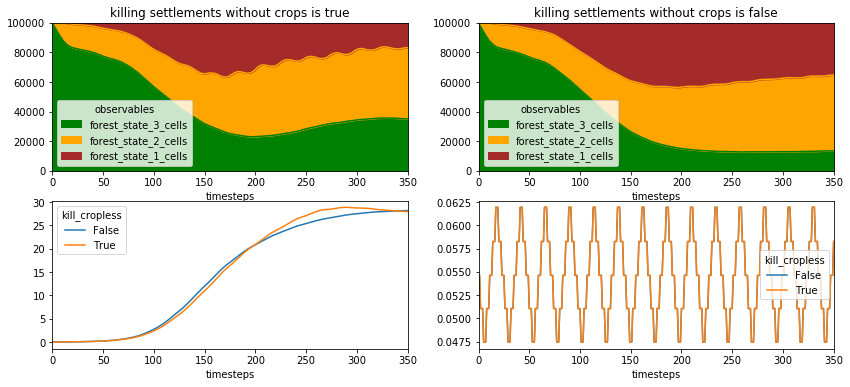

In [29]:
fig = plt.figure()
for i, t in enumerate([True, False]):
    ax = fig.add_subplot(2,2,i+1)
    
    all_cities['mean_trajectories'].xs(level='kill_cropless', key=t).unstack('observables')[['forest_state_3_cells', 'forest_state_2_cells',
       'forest_state_1_cells']].plot.area(ax=ax, color=['g', 'Orange', 'Brown'])
    ax.set_ylim([0, 100000])
    ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
ax = fig.add_subplot(223)
all_cities['mean_trajectories'].xs(level='observables', key='mean_soil_degradation').unstack('kill_cropless').plot(ax=ax)
ax = fig.add_subplot(224)
all_cities['mean_trajectories'].xs(level='observables', key='mean_waterflow').unstack('kill_cropless').plot(ax=ax)

Then look at the income from different parts of the ecosystem.

In the income from ecosystem services the decline in the forest state is not so clearly visible. And especially in the condition with settlements without agriculture staying alive, the income from forest increases, even while the forest stays declined.

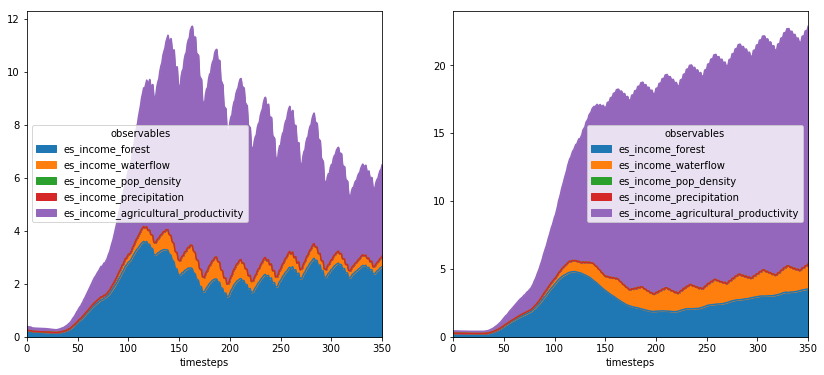

In [33]:
fig = plt.figure()
for i, t in enumerate([True, False]):
    ax = fig.add_subplot(1,2,i+1)
    
    all_cities['mean_trajectories'].xs(level='kill_cropless', key=t).unstack('observables')[
        ['es_income_forest',
       'es_income_waterflow',
       'es_income_pop_density', 'es_income_precipitation', 'es_income_agricultural_productivity']].plot.area(ax=ax)

I suspect, that the total income from ecosystem services mostly depends on the number of cells that settlements have under their controll. Therefore, I will normalize the income from ecosystem services to settlements' cells in influence.

Also, I find it crude, that agricultural productivity by itself produces ecosystem services, where the medium that actually produces the services relying on agricultural productivity is the forest ecosystem service. I therefore implement an alternative method for calculating income from ecosystem services by multiplying the values of agricultural productivity and forest state (0, 1 or 2) for each cell to get a combined measure that does not allow for full substitution.